In [1]:
# Will reload modeules after this when they change!
%load_ext autoreload
%autoreload 2

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import json
import ast

from metaspace.sm_annotation_utils import SMInstance

#from metaspace.sm_annotation_utils import SMInstance
import getpass

from results_local import results as results2

from metaspace.sm_annotation_utils import GraphQLClient
del GraphQLClient.DEFAULT_ANNOTATION_FILTER['hasHiddenAdduct']

sm = SMInstance()
sm

KeyError: 'hasHiddenAdduct'

In [4]:
import types
# Assign external function as method to object
sm.results2 = types.MethodType(results2, sm)

In [5]:
# Load secret stuff!
f = open('/Users/dis/.metaspace.json', "r")
secret = (f.read())
secret = secret.replace('\n','')
secret = ast.literal_eval(secret)
f.close()

In [6]:
# Logon
api_key = getpass.getpass(prompt='API key: ', stream=None)
sm.login(secret['email'], secret['password'])

API key: ········


In [7]:
# Load dataset
ds = sm.dataset(id="2017-05-17_19h49m04s")
ds
#ds.results2 = types.MethodType(results2, ds)

SMDataset(whole body xenograft (1) [RMS norm] | ID: 2017-05-17_19h49m04s)

# Tutorial for calling seraching specific database

https://github.com/metaspace2020/metaspace/blob/master/metaspace/python-client/example/compare-reference-engine-results.ipynb

In [8]:
# Doesn't work with custom database which exist?
results = results2(database='whole_body_MSMS_test_v3')

In [ ]:
# Adducts are weird?  Grouped by?
results

In [ ]:
results = results.reset_index()

In [ ]:
results.adduct.unique()

In [ ]:
results.adduct.value_counts()

In [ ]:
ds.all_annotation_images?

In [9]:
 x = ds.all_annotation_images(
    fdr=0.5,
    database='whole_body_MSMS_test_v3',
    only_first_isotope=True,
    scale_intensity=False,
    hasHiddenAdduct=True,
)

In [10]:
x[0]

IsotopeImages(C10H15N5O7P[M]+)

In [11]:
x[0].formula

'C10H15N5O7P'

In [12]:
x[0]._images

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)]

In [22]:
import matplotlib.image as mpimg
import numpy as np

In [18]:
def metaspace_hotspot_removal(img):
  awkwardness = np.max(img) / 255 # METASPACE holdover from 8-bit
  hot_thresold = np.percentile(img[img >= awkwardness], 99) or 1
  return np.clip(img, 0, hot_thresold) / hot_thresold

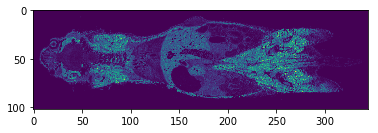

In [19]:
plt.imshow(x[0]._images[0])

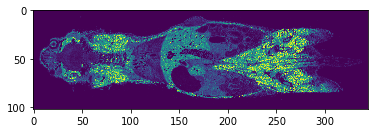

In [23]:
plt.imshow(metaspace_hotspot_removal(x[0]._images[0]))

Error in that adducts are not [M]+!
Otherwise appears to run.

-Goal: extract ion images from METASPACE and put in folders by assigned ID with parents and fragments together.

Previous notebook: 
http://localhost:8888/notebooks/PycharmProjects/word2vec/database_expt_msms_to_METASPACE.ipynb

Tutorial template:
https://github.com/metaspace2020/metaspace/blob/master/metaspace/python-client/example/iso_img_retrieval.ipynb
